In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Generate datasets
np.random.seed(42)  # For reproducibility
data_normal = np.random.normal(loc=0, scale=1, size=1000)  # Normal distribution
data_pos_skew = np.random.exponential(scale=1, size=1000)  # Positive skew (exponential)
data_neg_skew = -np.random.exponential(scale=1, size=1000)  # Negative skew (inverted exponential)


In [3]:
# Calculate IQR for each dataset
def calculate_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    return Q3 - Q1

In [4]:
iqr_normal = calculate_iqr(data_normal)
iqr_pos_skew = calculate_iqr(data_pos_skew)
iqr_neg_skew = calculate_iqr(data_neg_skew)

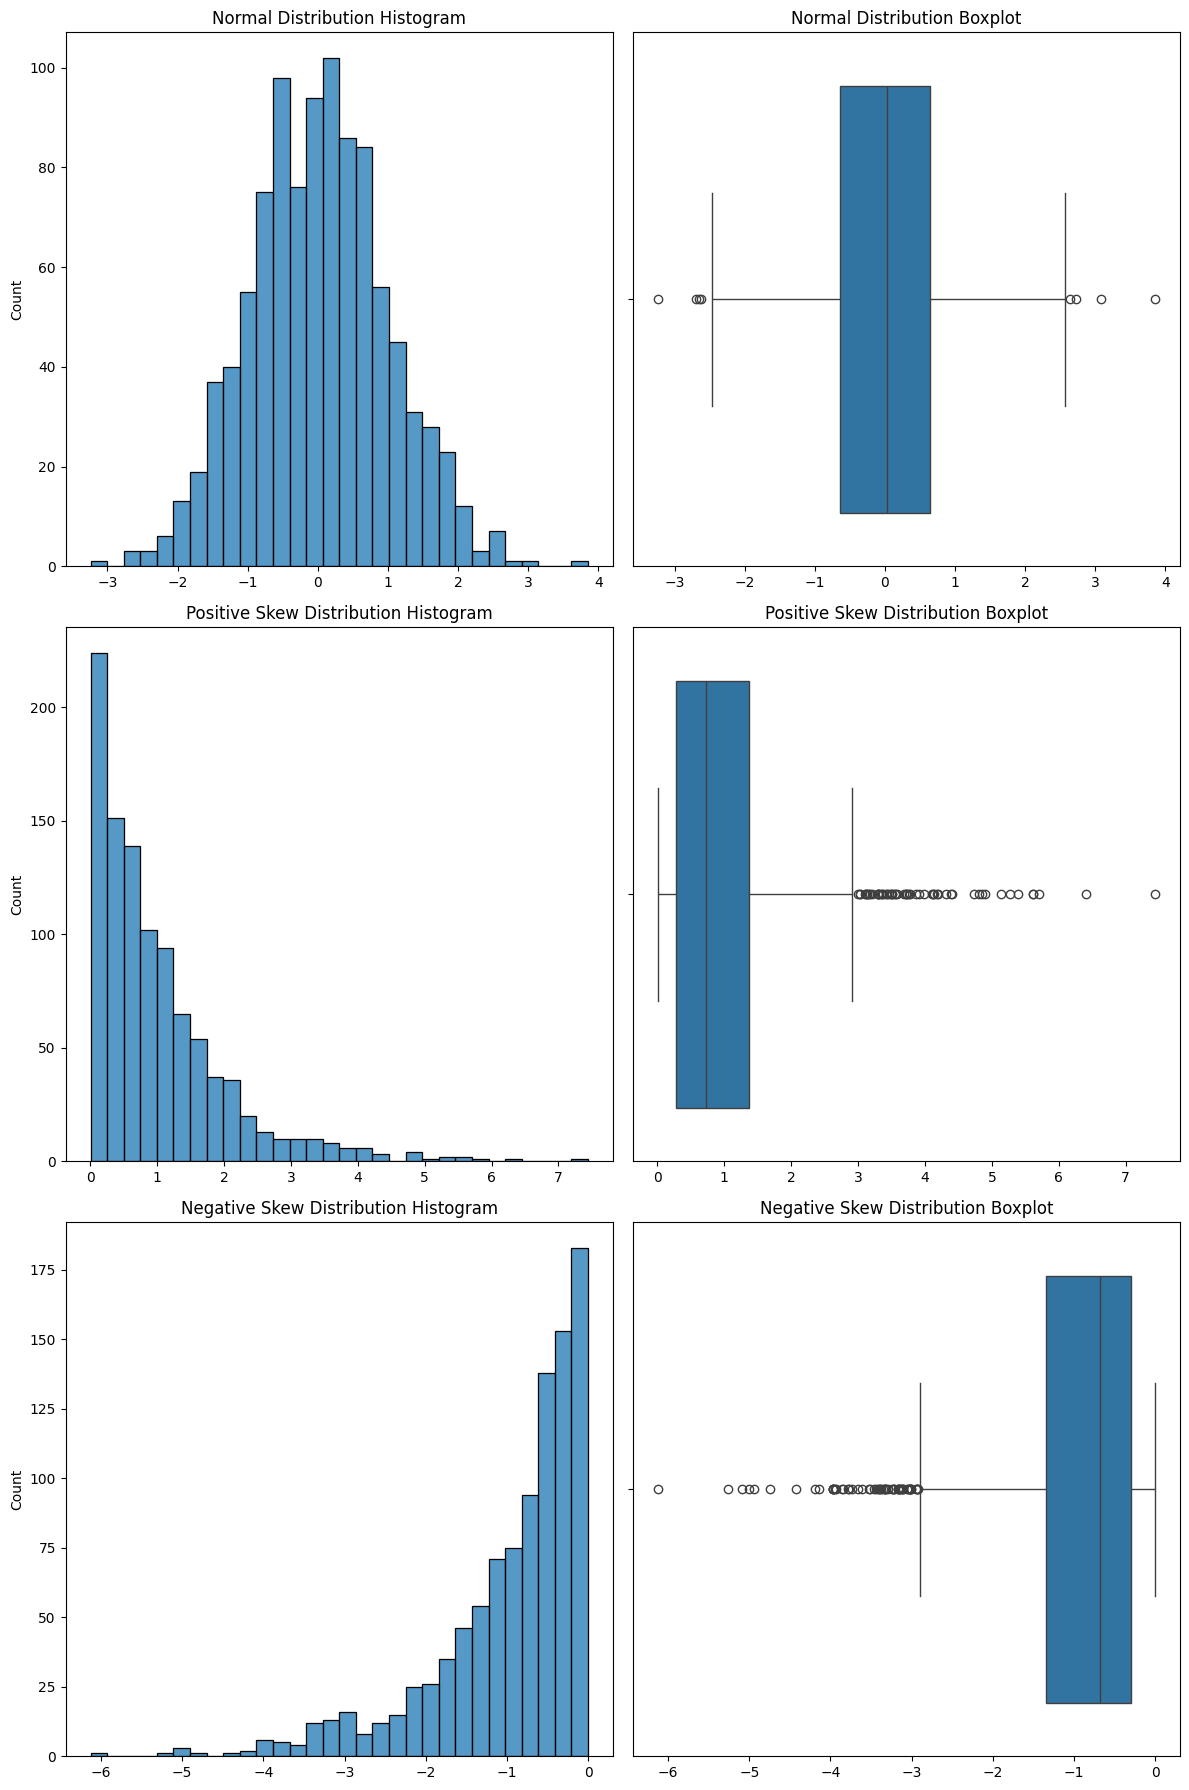

In [5]:
# Plotting
fig, axs = plt.subplots(3, 2, figsize=(12, 18))

# Histograms
sns.histplot(data_normal, bins=30, kde=False, ax=axs[0, 0])
axs[0, 0].set_title('Normal Distribution Histogram')
sns.histplot(data_pos_skew, bins=30, kde=False, ax=axs[1, 0])
axs[1, 0].set_title('Positive Skew Distribution Histogram')
sns.histplot(data_neg_skew, bins=30, kde=False, ax=axs[2, 0])
axs[2, 0].set_title('Negative Skew Distribution Histogram')


# Boxplots
sns.boxplot(x=data_normal, ax=axs[0, 1])
axs[0, 1].set_title('Normal Distribution Boxplot')
sns.boxplot(x=data_pos_skew, ax=axs[1, 1])
axs[1, 1].set_title('Positive Skew Distribution Boxplot')
sns.boxplot(x=data_neg_skew, ax=axs[2, 1])
axs[2, 1].set_title('Negative Skew Distribution Boxplot')

plt.tight_layout()
plt.show()

In [6]:
iqr_normal, iqr_pos_skew, iqr_neg_skew


(1.2955341809352818, 1.0877297361852798, 1.0453926758530803)

In [7]:
from scipy import stats


In [8]:
# Calculate mean, median, mode, variance, and standard deviation
def descriptive_statistics(data):
    mean = np.mean(data)
    median = np.median(data)
    mode = stats.mode(data)[0] # inaccurate way
    variance = np.var(data)
    std_dev = np.std(data)
    return mean, median, mode, variance, std_dev

In [9]:
stats_normal = descriptive_statistics(data_normal)
stats_pos_skew = descriptive_statistics(data_pos_skew)
stats_neg_skew = descriptive_statistics(data_neg_skew)

stats_normal, stats_pos_skew, stats_neg_skew

((0.01933205582232549,
  0.025300612234888248,
  -3.2412673400690726,
  0.9579049897315173,
  0.9787262077473543),
 (1.0079859336968675,
  0.7259312206849301,
  0.003223453352234625,
  1.00497996320746,
  1.0024868892945484),
 (-0.9732519613292628,
  -0.6767050494864418,
  -6.128822993904087,
  0.8927454528463854,
  0.9448520798762023))

In [10]:
def calculate_full_stats(data):
    mean = np.mean(data)
    median = np.median(data)
    # Using histogram bins to calculate a more representative mode for continuous data
    counts, bin_edges = np.histogram(data, bins=30)
    max_index = np.argmax(counts)
    mode = (bin_edges[max_index] + bin_edges[max_index + 1]) / 2  # Mid-point of the bin with the highest count
    return mean, median, mode

# Calculate stats with revised mode calculation
full_stats_normal = calculate_full_stats(data_normal)
full_stats_pos_skew = calculate_full_stats(data_pos_skew)
full_stats_neg_skew = calculate_full_stats(data_neg_skew)

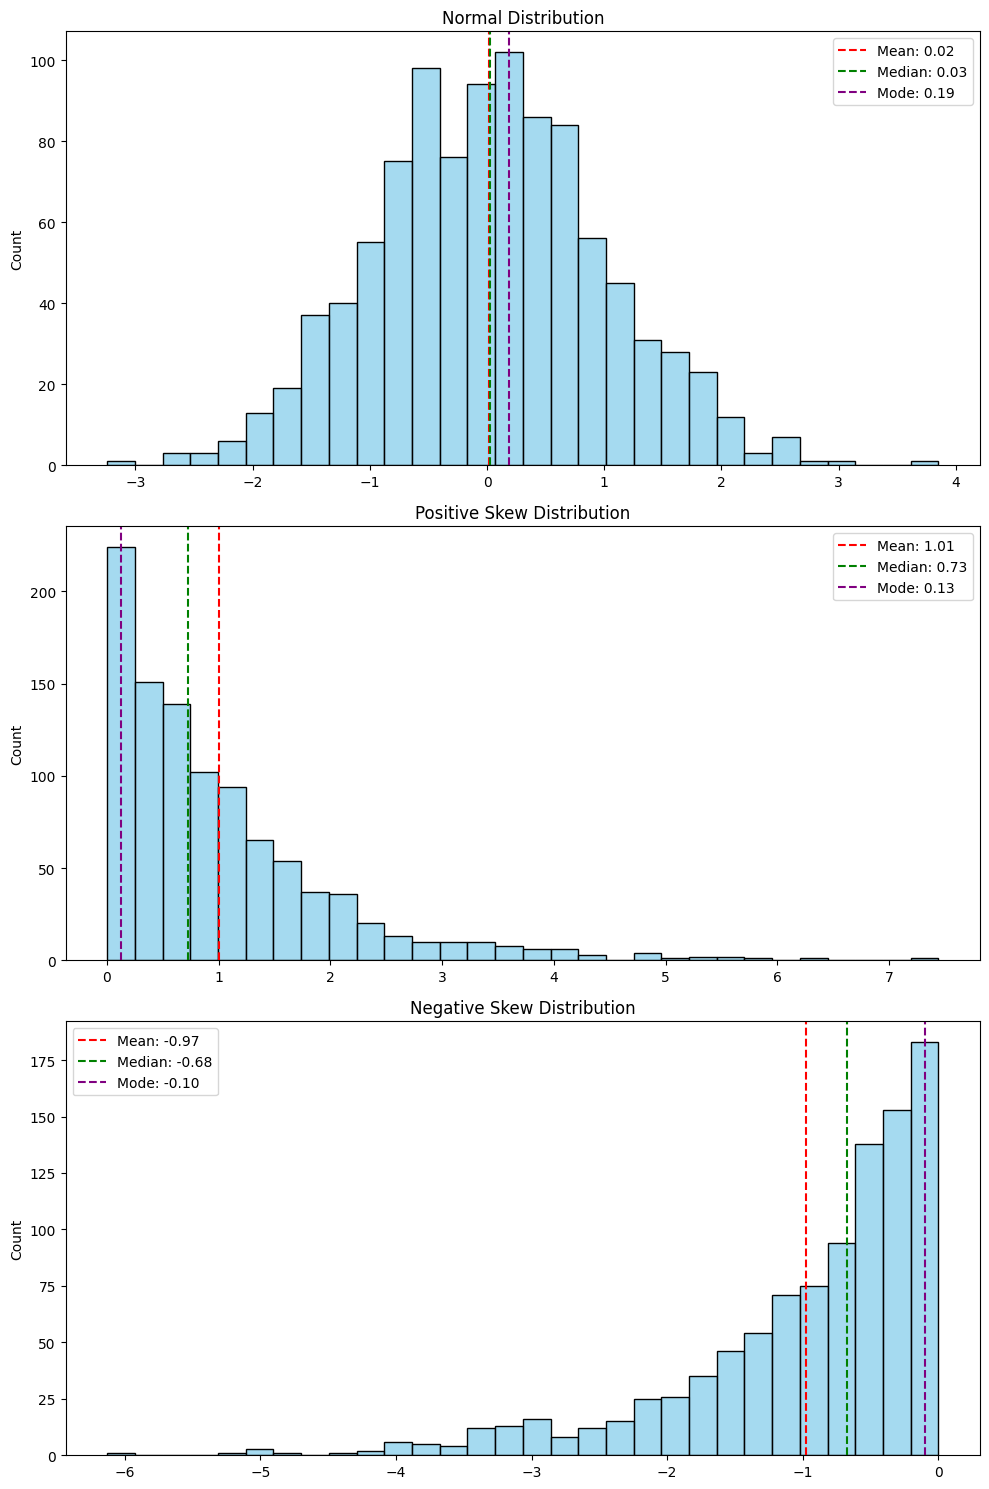

In [11]:
# Plotting Histograms with mean, median, and mode indicated
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

def plot_histogram_with_full_stats(ax, data, mean, median, mode, title):
    sns.histplot(data, bins=30, kde=False, ax=ax, color='skyblue')
    ax.axvline(mean, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean:.2f}')
    ax.axvline(median, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median:.2f}')
    ax.axvline(mode, color='purple', linestyle='dashed', linewidth=1.5, label=f'Mode: {mode:.2f}')
    ax.legend()
    ax.set_title(title)

plot_histogram_with_full_stats(axs[0], data_normal, *full_stats_normal, 'Normal Distribution')
plot_histogram_with_full_stats(axs[1], data_pos_skew, *full_stats_pos_skew, 'Positive Skew Distribution')
plot_histogram_with_full_stats(axs[2], data_neg_skew, *full_stats_neg_skew, 'Negative Skew Distribution')

plt.tight_layout()
plt.show()